In [1]:
# check from https://www.pveducation.org/pvcdrom/properties-of-sunlight/solar-time
# also check from http://sgemfinalreport.fi/files/WP611_photovoltaics%20HP%20Hellman.pdf
# original source: https://hal.archives-ouvertes.fr/hal-00361373/document

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz

In [13]:
# df = pd.read_csv('../datasets/solar_p_data/df_ready_to_train.csv', delimiter=',')
# df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
# df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
# df = df.drop(columns='datetime_converted')

# Feature engineering  continued: solar irradiance

Trying to make a feature that would reflect how the position of the sun affects the values

In [14]:
# df_weather = pd.read_csv('../datasets/solar_p_data/csv2015_04_22_till_2016_04_22.csv', delimiter=',')
# df_temp = pd.DataFrame()
df_irrad = pd.DataFrame()
#adding to one dataframe
for year in range(16,21):
    year_start = str(year-1)
    year_end = str(year)
    df_temp = pd.read_csv('../datasets/solar_p_data/20' + year_start + '_04_22_till_20'+ year_end + '_04_22_irrad.csv')
    df_irrad = pd.concat([df_irrad,df_temp],axis=0)

C:\Users\screwdriver\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [15]:
# df_weather['datetime'] = df_weather['Year'].astype(str)+'-'
df_irrad['datetime'] = df_irrad['Year'].astype(str)+'-'+df_irrad['m'].astype(str)+'-'+df_irrad['d'].astype(str)+' '+ df_irrad['Time'].astype(str)

In [16]:
df_irrad['datetime_converted'] = pd.to_datetime(df_irrad['datetime'], utc=True)
df_irrad = df_irrad.set_index(pd.DatetimeIndex(df_irrad['datetime_converted'],dayfirst=True))

In [17]:
# df_irrad = df_irrad.drop(columns='Reflected radiation (W/m2)')
df_irrad['Reflected radiation (W/m2)'] = df_irrad['Reflected radiation (W/m2)'].fillna(0)

In [18]:
df_irrad.head()

,Diffuse radiation (W/m2),Direct solar radiation (W/m2),Global radiation (W/m2),Reflected radiation (W/m2),Time,Time zone,Year,d,m,datetime,datetime_converted
datetime_converted,,,,,,,,,,,
2015-04-22 00:00:00+00:00,-1.9,-0.2,NaN,0.0,00:00,UTC,2015,22,4,2015-4-22 00:00,2015-04-22 00:00:00+00:00
2015-04-22 01:00:00+00:00,-2.1,-1.0,NaN,0.0,01:00,UTC,2015,22,4,2015-4-22 01:00,2015-04-22 01:00:00+00:00
2015-04-22 02:00:00+00:00,-1.8,-0.8,NaN,0.0,02:00,UTC,2015,22,4,2015-4-22 02:00,2015-04-22 02:00:00+00:00
2015-04-22 03:00:00+00:00,7.6,72.4,NaN,0.0,03:00,UTC,2015,22,4,2015-4-22 03:00,2015-04-22 03:00:00+00:00
2015-04-22 04:00:00+00:00,46.2,195.8,NaN,0.0,04:00,UTC,2015,22,4,2015-4-22 04:00,2015-04-22 04:00:00+00:00


In [19]:
df_irrad['Global radiation (W/m2)'] = df_irrad['Diffuse radiation (W/m2)'] + df_irrad['Direct solar radiation (W/m2)'] + df_irrad['Reflected radiation (W/m2)']

In [20]:
df_irrad.isnull().sum()

Diffuse radiation (W/m2)         45
Direct solar radiation (W/m2)    44
Global radiation (W/m2)          55
Reflected radiation (W/m2)        0
Time                              0
Time zone                         0
Year                              0
d                                 0
m                                 0
datetime                          0
datetime_converted                0
dtype: int64

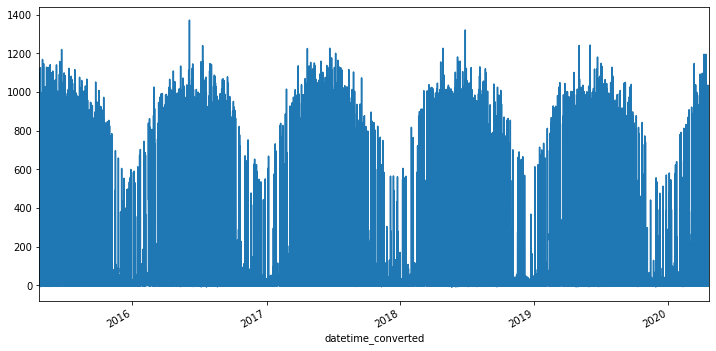

In [21]:
df_irrad['Global radiation (W/m2)'].plot(figsize=(12,6))

In [22]:
df_solar = pd.read_csv('../datasets/solar_p_data/data_solar.csv', delimiter=';')

In [23]:
df_solar['datetime_converted'] = pd.to_datetime(df_solar['Date'], utc=False)
df_solar['datetime_converted']=df_solar['datetime_converted'].dt.tz_localize(pytz.timezone('Europe/Helsinki'),nonexistent='NaT',ambiguous='NaT').dt.tz_convert('UTC')
df_solar = df_solar.set_index(pd.DatetimeIndex(df_solar['datetime_converted'],dayfirst=True))

In [24]:


df_solar['Value (kWh)'] = df_solar['Value (kWh)'].replace('-', np.nan)
df_solar['Value (kWh)'] = pd.to_numeric(df_solar['Value (kWh)'])
df_solar['Value (kWh)'] = df_solar['Value (kWh)'].fillna(0)
index_val = '2016-05-22 08:00:00+00:00'
# df['Value (kWh)'].index==index_val.replace(value=value_to_repl, inplace=True)
df_solar['Value (kWh)'].loc[index_val] = 181.5
val_index = '2017-06-07 15:00:00+00:00'
slice_1 = '2017-06-07 14:00:00+00:00'
slice_2 = '2017-06-07 16:00:00+00:00'
df_solar['Value (kWh)'].loc[val_index] = (df_solar['Value (kWh)'].loc[slice_1]+df_solar['Value (kWh)'].loc[slice_2])/2


C:\Users\screwdriver\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


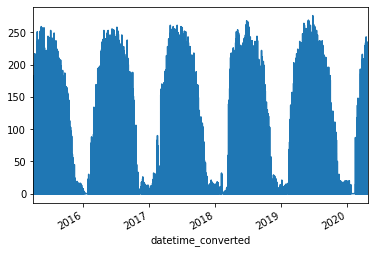

In [25]:
df_solar['Value (kWh)'].plot()

In [26]:
df_irrad = df_irrad[~df_irrad.index.duplicated(keep='first')]
df_solar = df_solar[~df_solar.index.duplicated(keep='first')]

In [27]:
# df_irrad = df_irrad['Global radiation (W/m2)']
# df_solar = df_solar['Value (kWh)']
df = pd.concat([df_irrad['Global radiation (W/m2)'], df_irrad['Diffuse radiation (W/m2)'],df_irrad['Direct solar radiation (W/m2)'],df_solar['Value (kWh)']], axis=1)

In [28]:
df_irrad

,Diffuse radiation (W/m2),Direct solar radiation (W/m2),Global radiation (W/m2),Reflected radiation (W/m2),Time,Time zone,Year,d,m,datetime,datetime_converted
datetime_converted,,,,,,,,,,,
2015-04-22 00:00:00+00:00,-1.9,-0.2,-2.1,0.0,00:00,UTC,2015,22,4,2015-4-22 00:00,2015-04-22 00:00:00+00:00
2015-04-22 01:00:00+00:00,-2.1,-1.0,-3.1,0.0,01:00,UTC,2015,22,4,2015-4-22 01:00,2015-04-22 01:00:00+00:00
2015-04-22 02:00:00+00:00,-1.8,-0.8,-2.6,0.0,02:00,UTC,2015,22,4,2015-4-22 02:00,2015-04-22 02:00:00+00:00
2015-04-22 03:00:00+00:00,7.6,72.4,80.0,0.0,03:00,UTC,2015,22,4,2015-4-22 03:00,2015-04-22 03:00:00+00:00
2015-04-22 04:00:00+00:00,46.2,195.8,242.0,0.0,04:00,UTC,2015,22,4,2015-4-22 04:00,2015-04-22 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 20:00:00+00:00,-2.7,-0.2,-2.9,0.0,20:00,UTC,2020,22,4,2020-4-22 20:00,2020-04-22 20:00:00+00:00
2020-04-22 21:00:00+00:00,-2.6,-0.6,-3.2,0.0,21:00,UTC,2020,22,4,2020-4-22 21:00,2020-04-22 21:00:00+00:00
2020-04-22 22:00:00+00:00,-2.3,-0.2,-2.5,0.0,22:00,UTC,2020,22,4,2020-4-22 22:00,2020-04-22 22:00:00+00:00


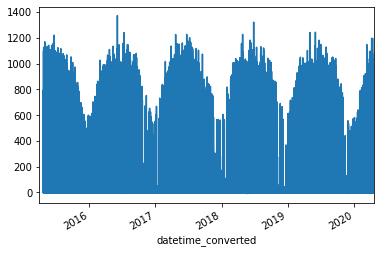

In [29]:
df['Global radiation (W/m2)'].plot()

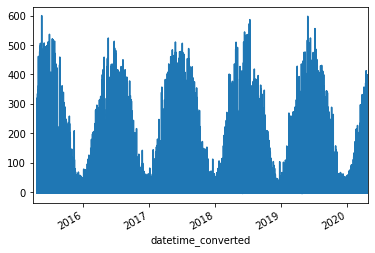

In [30]:
df['Diffuse radiation (W/m2)'].plot()

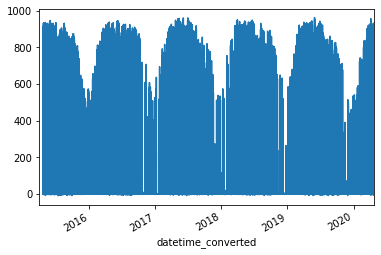

In [31]:
df['Direct solar radiation (W/m2)'].plot()

In [32]:
df.isnull().sum()

Global radiation (W/m2)          580
Diffuse radiation (W/m2)         570
Direct solar radiation (W/m2)    569
Value (kWh)                       11
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df['day_of_the_year']=df.index.dayofyear

In [35]:
df.corr()

,Global radiation (W/m2),Diffuse radiation (W/m2),Direct solar radiation (W/m2),Value (kWh),day_of_the_year
Global radiation (W/m2),1.000000,0.555678,0.968287,0.824398,-0.074041
Diffuse radiation (W/m2),0.555678,1.000000,0.330340,0.679010,-0.051314
Direct solar radiation (W/m2),0.968287,0.330340,1.000000,0.731869,-0.068636
Value (kWh),0.824398,0.679010,0.731869,1.000000,-0.046553
day_of_the_year,-0.074041,-0.051314,-0.068636,-0.046553,1.000000


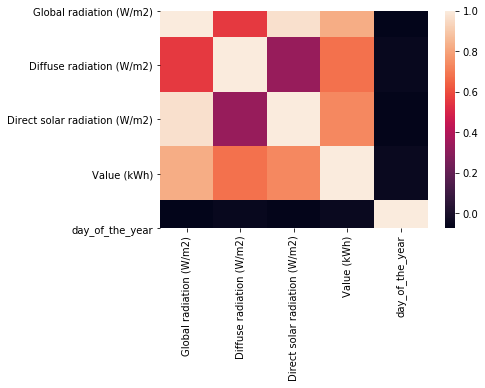

In [36]:
sns.heatmap(df.corr())

# Adding weather data

In [37]:
df_weather = pd.DataFrame()
#adding to one dataframe
for year in range(16,21):
    year_start = str(year-1)
    year_end = str(year)
    df_temp = pd.read_csv('../datasets/solar_p_data/csv20' + year_start + '_04_22_till_20'+ year_end + '_04_22.csv')
    df_weather = pd.concat([df_weather,df_temp],axis=0)

In [38]:
df_weather

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,2015,4,22,00:00,UTC,7.0,1018.2,65.0,0.0,-1.0,6.9,0.8,50000.0,253.0,4.1,3.1
1,2015,4,22,01:00,UTC,1.0,1017.9,71.0,0.0,-1.0,5.8,1.0,50000.0,257.0,4.9,3.4
2,2015,4,22,02:00,UTC,3.0,1017.5,76.0,0.0,-1.0,4.9,0.9,50000.0,272.0,5.4,4.0
3,2015,4,22,03:00,UTC,5.0,1017.3,77.0,0.0,-1.0,4.9,1.1,49820.0,276.0,6.0,4.3
4,2015,4,22,04:00,UTC,0.0,1016.9,76.0,0.0,-1.0,4.9,0.9,49560.0,284.0,5.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,2020,4,22,20:00,UTC,0.0,1021.3,62.0,0.0,0.0,6.4,-0.4,50000.0,267.0,4.9,3.6
8805,2020,4,22,21:00,UTC,0.0,1021.0,69.0,0.0,0.0,5.2,0.0,50000.0,291.0,5.2,3.8
8806,2020,4,22,22:00,UTC,0.0,1021.0,63.0,0.0,0.0,5.5,-1.0,50000.0,325.0,4.6,3.3
8807,2020,4,22,23:00,UTC,0.0,1020.6,65.0,0.0,0.0,4.4,-1.6,50000.0,321.0,4.1,3.3


In [39]:
df_weather['datetime'] = df_weather['Year'].astype(str)+'-'+df_weather['m'].astype(str)+'-'+df_weather['d'].astype(str)+' '+ df_weather['Time'].astype(str)
df_weather['datetime_converted'] = pd.to_datetime(df_weather['datetime'], utc=True)
df_weather = df_weather.set_index(pd.DatetimeIndex(df_weather['datetime_converted'],dayfirst=True))

In [40]:
cols_weather = ['Cloud amount (1/8)',
       'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)',
       'Air temperature (degC)', 'Dew-point temperature (degC)',
       'Horizontal visibility (m)', 'Wind direction (deg)',
       'Wind speed (m/s)']

In [41]:
df_weather = df_weather[~df_weather.index.duplicated(keep='first')]

In [42]:
df_concat = pd.concat([df,df_weather[cols_weather]], axis=1)

In [43]:
df_concat.isnull().mean()

Global radiation (W/m2)           0.001504
Diffuse radiation (W/m2)          0.001504
Direct solar radiation (W/m2)     0.001504
Value (kWh)                       0.001504
day_of_the_year                   0.001504
Cloud amount (1/8)                0.001550
Pressure (msl) (hPa)              0.001071
Relative humidity (%)             0.001071
Precipitation intensity (mm/h)    0.003237
Air temperature (degC)            0.119572
Dew-point temperature (degC)      0.038156
Horizontal visibility (m)         0.021973
Wind direction (deg)              0.005835
Wind speed (m/s)                  0.005835
dtype: float64

In [44]:
df_concat = df_concat.dropna()

In [45]:
df_concat.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)'],
      dtype='object')

In [46]:
df_concat.corr()

,Global radiation (W/m2),Diffuse radiation (W/m2),Direct solar radiation (W/m2),Value (kWh),day_of_the_year,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Wind speed (m/s)
Global radiation (W/m2),1.000000,0.552555,0.967185,0.827263,-0.067220,-0.457295,0.130369,-0.627205,-0.086062,0.433112,0.145304,0.191700,0.012085,0.033964
Diffuse radiation (W/m2),0.552555,1.000000,0.322660,0.680200,-0.047704,-0.026660,-0.002665,-0.407006,-0.056361,0.413047,0.246438,0.121180,-0.017489,0.060770
Direct solar radiation (W/m2),0.967185,0.322660,1.000000,0.732110,-0.061795,-0.511187,0.148863,-0.588200,-0.080553,0.365941,0.089887,0.180759,0.019056,0.020046
Value (kWh),0.827263,0.680200,0.732110,1.000000,-0.048245,-0.291964,0.081585,-0.584955,-0.064665,0.481464,0.214553,0.131520,-0.020021,0.085265
day_of_the_year,-0.067220,-0.047704,-0.061795,-0.048245,1.000000,0.043760,0.118144,0.129592,0.010598,0.249494,0.339002,0.052065,-0.030306,-0.031923
Cloud amount (1/8),-0.457295,-0.026660,-0.511187,-0.291964,0.043760,1.000000,-0.254680,0.445221,0.138928,-0.224586,-0.024533,-0.388347,-0.122915,0.125923
Pressure (msl) (hPa),0.130369,-0.002665,0.148863,0.081585,0.118144,-0.254680,1.000000,-0.225974,-0.136666,0.040301,-0.063829,0.185716,-0.085561,-0.248718
Relative humidity (%),-0.627205,-0.407006,-0.588200,-0.584955,0.129592,0.445221,-0.225974,1.000000,0.153214,-0.394433,0.077191,-0.527014,-0.048067,-0.063823
Precipitation intensity (mm/h),-0.086062,-0.056361,-0.080553,-0.064665,0.010598,0.138928,-0.136666,0.153214,1.000000,-0.004451,0.064704,-0.261318,-0.066630,0.078161
Air temperature (degC),0.433112,0.413047,0.365941,0.481464,0.249494,-0.224586,0.040301,-0.394433,-0.004451,1.000000,0.882104,0.148512,-0.081752,-0.015597


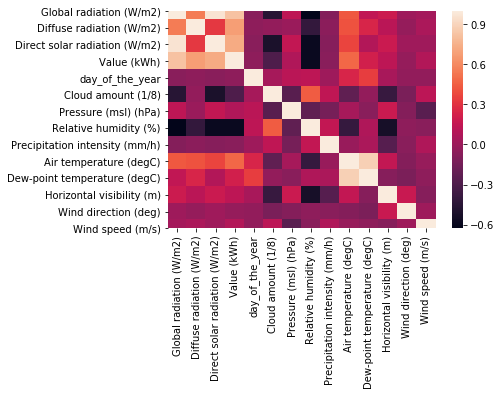

In [47]:
sns.heatmap(df_concat.corr())

In [48]:
cols = ['Global radiation (W/m2)', 'Value (kWh)', 'Cloud amount (1/8)', 'Precipitation intensity (mm/h)', 'Air temperature (degC)']
df_concat[cols].corr()

,Global radiation (W/m2),Value (kWh),Cloud amount (1/8),Precipitation intensity (mm/h),Air temperature (degC)
Global radiation (W/m2),1.000000,0.827263,-0.457295,-0.086062,0.433112
Value (kWh),0.827263,1.000000,-0.291964,-0.064665,0.481464
Cloud amount (1/8),-0.457295,-0.291964,1.000000,0.138928,-0.224586
Precipitation intensity (mm/h),-0.086062,-0.064665,0.138928,1.000000,-0.004451
Air temperature (degC),0.433112,0.481464,-0.224586,-0.004451,1.000000


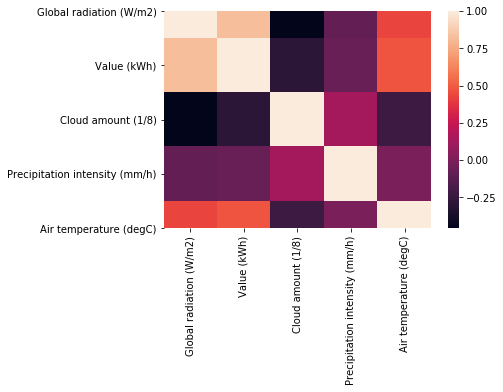

In [49]:
sns.heatmap(df_concat[cols].corr())

In [50]:
# df_concat = df_concat.drop(columns=['Diffuse radiation (W/m2)',
#        'Direct solar radiation (W/m2)'])

In [51]:
df_concat.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)'],
      dtype='object')

In [52]:
# df_concat.to_csv('../datasets/solar_p_data/df_with_irradiance.csv')

In [53]:
# df = pd.read_csv('../datasets/solar_p_data/df_with_irradiance.csv', delimiter=',')
# df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
# df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
# df = df.drop(columns='datetime_converted')

# New features

1. azimuth and irradiance

2. trends / rolling avg. values of certain variables.

# IMPORTANT ! ALL THE COUNT DIVISION TRANSFORMATION OF VARIABLES SHOULD BE DONE OVER THE TRAINING SET!

In [54]:
df = df_concat.copy()

In [55]:
len(df_concat)

37473

### Since horizontal visibility has over 25% in the 50 000, it seems that 50 000 is just the cap, thus, we can try to categorize this variable and divide it either less than 50 000 and 50 000 , or into 5 categories

1. let's try first into <  50 000 and >= 50 000

2. equal frequency?

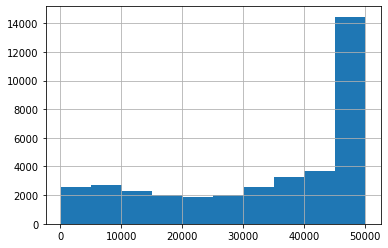

In [56]:
df['Horizontal visibility (m)'].hist()

In [57]:
len(df[(df['Horizontal visibility (m)']>=40000)&(df['Horizontal visibility (m)']<50000)])

7446

In [58]:
buckets = [0,9999,19999,29999,39999,49999,50000]
labels = ['[0-10k)','[10-20k)','[20-30k)','[30-40k)','[40-50k)','[50k+']
df['Hor_vis_buckets_labels'] = pd.cut(df['Horizontal visibility (m)'], bins=buckets, labels=labels, include_lowest=True)
df['Hor_vis_buckets'] = pd.cut(df['Horizontal visibility (m)'], bins=buckets, include_lowest=True)

cols = ['Horizontal visibility (m)', 'Hor_vis_buckets_labels', 'Hor_vis_buckets']
df[cols].head()

,Horizontal visibility (m),Hor_vis_buckets_labels,Hor_vis_buckets
datetime_converted,,,
2015-04-22 00:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 01:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 02:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 03:00:00+00:00,49820.0,[40-50k),"(39999.0, 49999.0]"
2015-04-22 04:00:00+00:00,49560.0,[40-50k),"(39999.0, 49999.0]"


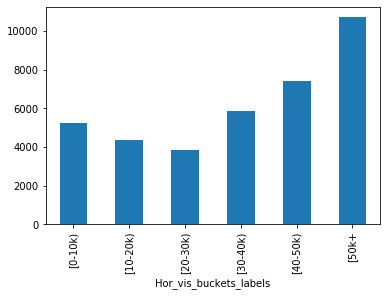

In [59]:
df.groupby('Hor_vis_buckets_labels')['Horizontal visibility (m)'].count().plot.bar()

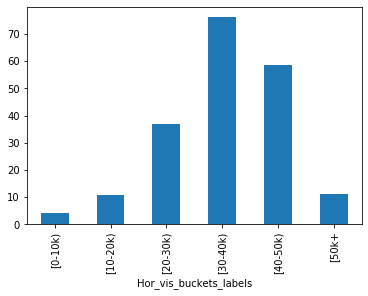

In [60]:
df.groupby('Hor_vis_buckets_labels')['Value (kWh)'].mean().plot.bar()

Not sure if it was more useful to create less groups out of that. So we try with this.

Or let's try equal frequency discretizing

In [61]:
Hor_vis_disccretised, intervals = pd.qcut(
    df['Horizontal visibility (m)'], 5, labels=None, retbins=True, precision=3, duplicates='drop')

pd.concat([Hor_vis_disccretised, df['Horizontal visibility (m)']], axis=1).head(10)

,Horizontal visibility (m),Horizontal visibility (m)
datetime_converted,,
2015-04-22 00:00:00+00:00,"(44270.0, 50000.0]",50000.0
2015-04-22 01:00:00+00:00,"(44270.0, 50000.0]",50000.0
2015-04-22 02:00:00+00:00,"(44270.0, 50000.0]",50000.0
2015-04-22 03:00:00+00:00,"(44270.0, 50000.0]",49820.0
2015-04-22 04:00:00+00:00,"(44270.0, 50000.0]",49560.0
2015-04-22 05:00:00+00:00,"(33130.0, 44270.0]",36590.0
2015-04-22 06:00:00+00:00,"(44270.0, 50000.0]",45630.0
2015-04-22 07:00:00+00:00,"(33130.0, 44270.0]",41740.0
2015-04-22 08:00:00+00:00,"(33130.0, 44270.0]",37800.0


In [62]:
intervals

array([  130., 14854., 33130., 44270., 50000.])

In [63]:
Hor_vis_disccretised.value_counts()

(44270.0, 50000.0]    14980
(33130.0, 44270.0]     7502
(14854.0, 33130.0]     7496
(129.999, 14854.0]     7495
Name: Horizontal visibility (m), dtype: int64

### Tailormade discretization
* [50000]
* (33130.0, 49999.0]
* (14854.0, 33130.0]
* [0, 14854.0]

In [64]:
buckets = [0,14854, 33130,49999,50000]
labels = ['[0-14.8k)','[14.8-33.1k)','[33.1-49.9k)','[50k+']
df['Hor_vis_buckets_labels'] = pd.cut(df['Horizontal visibility (m)'], bins=buckets, labels=labels, include_lowest=True)
df['Hor_vis_buckets'] = pd.cut(df['Horizontal visibility (m)'], bins=buckets, include_lowest=True)

cols = ['Horizontal visibility (m)', 'Hor_vis_buckets_labels', 'Hor_vis_buckets']
df[cols].head()

,Horizontal visibility (m),Hor_vis_buckets_labels,Hor_vis_buckets
datetime_converted,,,
2015-04-22 00:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 01:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 02:00:00+00:00,50000.0,[50k+,"(49999.0, 50000.0]"
2015-04-22 03:00:00+00:00,49820.0,[33.1-49.9k),"(33130.0, 49999.0]"
2015-04-22 04:00:00+00:00,49560.0,[33.1-49.9k),"(33130.0, 49999.0]"


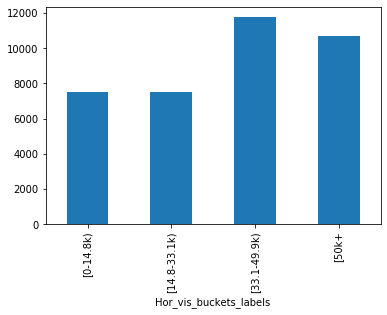

In [65]:
df.groupby('Hor_vis_buckets_labels')['Horizontal visibility (m)'].count().plot.bar()

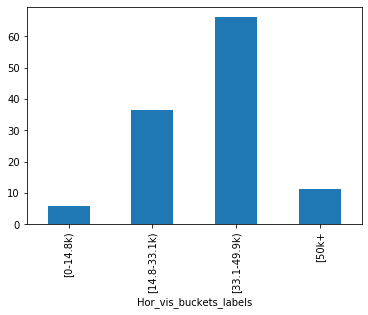

In [66]:
df.groupby('Hor_vis_buckets_labels')['Value (kWh)'].mean().plot.bar()

Let's stick with this! Don't forget to do this on Train and Test separately, actually!

### Cloud amount also needs to be discretized probably

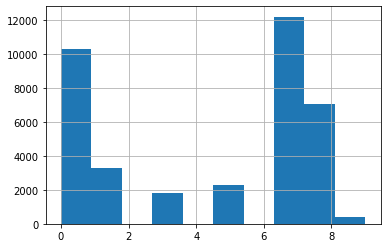

In [67]:
df['Cloud amount (1/8)'].hist()

In [68]:
print(len(df['Cloud amount (1/8)'].unique()))
print(df['Cloud amount (1/8)'].unique())

7
[7. 1. 3. 5. 0. 8. 9.]


In [69]:
len(df[df['Cloud amount (1/8)']<=5])

17779

In [70]:
len(df[df['Cloud amount (1/8)']>5])

19694

Let's try to make it binary with <=5 and >5

In [71]:
buckets = [0,5,10]
labels = ['<=5','>5']
df['Cloud_buckets_labels'] = pd.cut(df['Cloud amount (1/8)'], bins=buckets, labels=labels, include_lowest=True)
df['Cloud_buckets'] = pd.cut(df['Cloud amount (1/8)'], bins=buckets, include_lowest=True)

cols = ['Cloud amount (1/8)', 'Cloud_buckets_labels', 'Cloud_buckets']
df[cols].head()

,Cloud amount (1/8),Cloud_buckets_labels,Cloud_buckets
datetime_converted,,,
2015-04-22 00:00:00+00:00,7.0,>5,"(5.0, 10.0]"
2015-04-22 01:00:00+00:00,1.0,<=5,"(-0.001, 5.0]"
2015-04-22 02:00:00+00:00,3.0,<=5,"(-0.001, 5.0]"
2015-04-22 03:00:00+00:00,5.0,<=5,"(-0.001, 5.0]"
2015-04-22 04:00:00+00:00,0.0,<=5,"(-0.001, 5.0]"


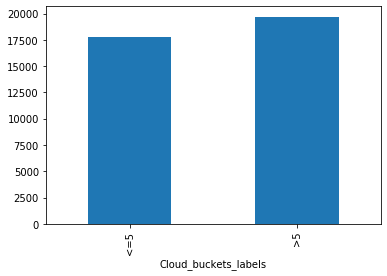

In [72]:
df.groupby('Cloud_buckets_labels')['Cloud amount (1/8)'].count().plot.bar()

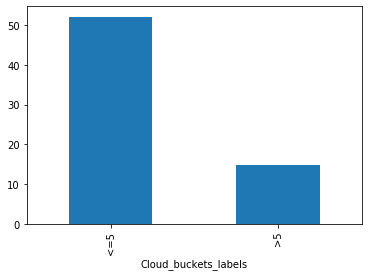

In [73]:
df.groupby('Cloud_buckets_labels')['Value (kWh)'].mean().plot.bar()

 We go with this!

### Should we also discretize wind by direction into 8 categories?

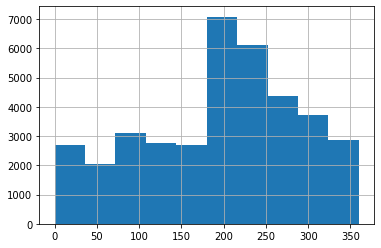

In [74]:
df['Wind direction (deg)'].hist()

In [75]:
len(df['Wind direction (deg)'].unique())

361

In [76]:
df['Wind direction (deg)'][(df['Wind direction (deg)']>=0)&(df['Wind direction (deg)']<11.25)] = df['Wind direction (deg)'].apply(lambda x: x+360)

C:\Users\screwdriver\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
# df['Wind direction (deg)'].unique()

In [78]:
buckets = np.arange(11.25, 372, 22.5)
labels = np.array('N NNE NE ENE E ESE SE SSE S SSW SW WSW W WNW NW NNW N'.split())
df['Wind_direction'] = labels[np.digitize(df['Wind direction (deg)'], buckets)]

In [79]:
df['Wind_direction']

datetime_converted
2015-04-22 00:00:00+00:00    WSW
2015-04-22 01:00:00+00:00    WSW
2015-04-22 02:00:00+00:00      W
2015-04-22 03:00:00+00:00      W
2015-04-22 04:00:00+00:00    WNW
                            ... 
2020-04-22 20:00:00+00:00      W
2020-04-22 21:00:00+00:00    WNW
2020-04-22 22:00:00+00:00     NW
2020-04-22 23:00:00+00:00     NW
2020-04-23 00:00:00+00:00     NW
Name: Wind_direction, Length: 37473, dtype: object

Let's go with that!

### Precipitation into a binary variable

In [80]:
len(df['Precipitation intensity (mm/h)'].unique())

89

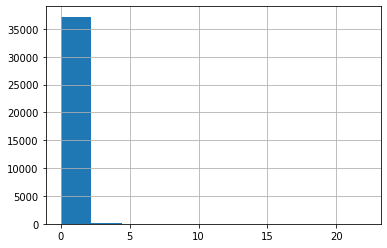

In [81]:
df['Precipitation intensity (mm/h)'].hist()

In [82]:
df['Precipitation intensity (mm/h)'].unique()

array([ 0. ,  0.8,  0.5,  0.7,  1.1,  2.6,  0.4,  2.5,  3.2,  2.4,  0.3,
        2. ,  2.7,  5.8,  3.4,  1. ,  1.6,  1.4,  1.5,  1.9,  0.1,  0.9,
        1.3,  2.8,  0.6,  0.2,  4.9,  1.2,  1.8,  3. ,  2.1,  5.5,  5. ,
        1.7,  4.7,  2.9,  6.7,  2.3,  3.8, 20. ,  6.3,  7.5,  7.7,  2.2,
        4.1,  3.1, 13.3,  9.1,  6.2,  5.9,  9.8,  3.3,  3.5,  3.6, 14.6,
        8.6,  7.4,  5.2,  4.6, 12.1, 15.7,  5.6,  3.9,  4.4,  8.9,  3.7,
        7.8,  7. ,  6.6,  8.2,  6.1,  8.5,  6.9,  4. ,  7.1,  9.3,  4.3,
       12.5,  5.3,  5.7,  9.5, 13.9, 22.1, 21. ,  8.8,  6.5, 17.7,  7.3,
       15.4])

In [83]:
len(df[df['Precipitation intensity (mm/h)']==0])

34654

In [84]:
buckets = [-1,0,10]
labels = [0,1]
df['Precip_buckets_labels'] = pd.cut(df['Precipitation intensity (mm/h)'], bins=buckets, labels=labels, include_lowest=True)
df['Precip_buckets'] = pd.cut(df['Precipitation intensity (mm/h)'], bins=buckets, include_lowest=True)

cols = ['Precipitation intensity (mm/h)', 'Precip_buckets_labels', 'Precip_buckets']
df[cols][df['Precip_buckets_labels']==1]

,Precipitation intensity (mm/h),Precip_buckets_labels,Precip_buckets
datetime_converted,,,
2015-04-26 04:00:00+00:00,0.8,1,"(0.0, 10.0]"
2015-04-26 05:00:00+00:00,0.5,1,"(0.0, 10.0]"
2015-04-26 06:00:00+00:00,0.7,1,"(0.0, 10.0]"
2015-04-26 07:00:00+00:00,1.1,1,"(0.0, 10.0]"
2015-04-26 08:00:00+00:00,2.6,1,"(0.0, 10.0]"
...,...,...,...
2020-04-16 04:00:00+00:00,1.8,1,"(0.0, 10.0]"
2020-04-16 05:00:00+00:00,0.4,1,"(0.0, 10.0]"
2020-04-16 06:00:00+00:00,0.6,1,"(0.0, 10.0]"


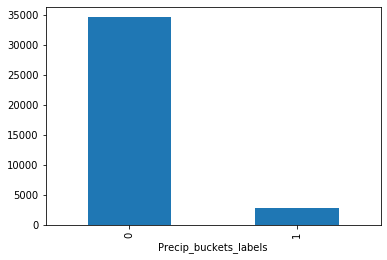

In [85]:
df.groupby('Precip_buckets_labels')['Precipitation intensity (mm/h)'].count().plot.bar()

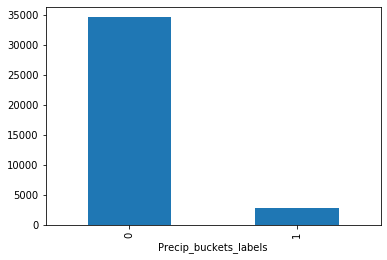

In [86]:
df.groupby('Precip_buckets_labels')['Value (kWh)'].count().plot.bar()

Let's go with this one!

# Gotta find how to df.apply() the function with rows in python

In [87]:
df['hour']=df.index.hour

In [88]:
df.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)', 'Hor_vis_buckets_labels',
       'Hor_vis_buckets', 'Cloud_buckets_labels', 'Cloud_buckets',
       'Wind_direction', 'Precip_buckets_labels', 'Precip_buckets', 'hour'],
      dtype='object')

In [89]:
# df['test'] = df.apply(lambda x: test_func(x['hour'],x['day_of_the_year']),axis=1)

In [92]:
from azimuth_one_script import *
longtitude = 24.9693
latitude = 60.1867
delta_GMT = 0

In [103]:
def calc_glob_irrad(N,time,lon=longtitude,delta_GMT=0,phi=latitude):
    gamma = 0
    beta=45
    omega = calc_omega(N, lon, delta_GMT, time)
    delta = calc_delta(N)
    alpha_s = calc_alpha_s(phi, delta, omega)
    if alpha_s>0:
        gamma_s = calc_gamma_s(alpha_s, phi, delta, omega)
        cos_theta_i = calc_cos_theta_i(alpha_s, gamma_s, gamma, beta)
        if cos_theta_i>0:
            G_on = calc_G_on(N)
            G_beam = calc_direct_irrad(G_on, alpha_s, cos_theta_i, T_L=2)
            T_rd = calc_t_rd(T_L=2)
            G_d = calc_diffuse_irrad(T_rd, alpha_s, G_on, beta)

            G_glob = G_beam + G_d
            return G_glob

In [104]:
df.columns

Index(['Global radiation (W/m2)', 'Diffuse radiation (W/m2)',
       'Direct solar radiation (W/m2)', 'Value (kWh)', 'day_of_the_year',
       'Cloud amount (1/8)', 'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Air temperature (degC)',
       'Dew-point temperature (degC)', 'Horizontal visibility (m)',
       'Wind direction (deg)', 'Wind speed (m/s)', 'Hor_vis_buckets_labels',
       'Hor_vis_buckets', 'Cloud_buckets_labels', 'Cloud_buckets',
       'Wind_direction', 'Precip_buckets_labels', 'Precip_buckets', 'hour'],
      dtype='object')

In [105]:
# df['diffuse_test'] = df.apply(lambda x: diffuse_calc(x['day_of_the_year'], x['hour']),axis=1)
df['glob_irrad_theor'] = df.apply(lambda x: calc_glob_irrad(N=x['day_of_the_year'],time=x['hour']),axis=1)

In [108]:
cols = ['Global radiation (W/m2)','glob_irrad_theor','Value (kWh)']
df[cols].corr()

,Global radiation (W/m2),glob_irrad_theor,Value (kWh)
Global radiation (W/m2),1.000000,0.549442,0.827263
glob_irrad_theor,0.549442,1.000000,0.819591
Value (kWh),0.827263,0.819591,1.000000


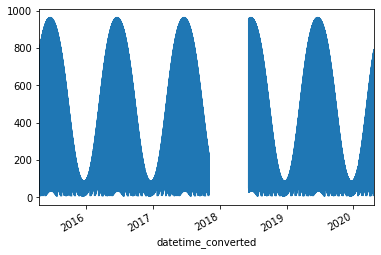

In [107]:
df['glob_irrad_theor'].plot()

In [124]:
df

,Global radiation (W/m2),Diffuse radiation (W/m2),Direct solar radiation (W/m2),Value (kWh),day_of_the_year,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Air temperature (degC),...,Cloud_buckets_labels,Cloud_buckets,Wind_direction,Precip_buckets_labels,Precip_buckets,hour,glob_test,incidence_angle,true_solar_elev_angle,solar_elev_angle
datetime_converted,,,,,,,,,,,,,,,,,,,,,
2015-04-22 00:00:00+00:00,-2.1,-1.9,-0.2,0.0,112.0,7.0,1018.2,65.0,0.0,6.9,...,>5,"(5.0, 10.0]",WSW,0,"(-1.001, 0.0]",0,-16.129272,146.194050,-16.129272,-16.058955
2015-04-22 01:00:00+00:00,-3.1,-2.1,-1.0,0.0,112.0,1.0,1017.9,71.0,0.0,5.8,...,<=5,"(-0.001, 5.0]",WSW,0,"(-1.001, 0.0]",1,-12.646159,135.694026,-12.646159,-12.546045
2015-04-22 02:00:00+00:00,-2.6,-1.8,-0.8,0.0,112.0,3.0,1017.5,76.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",W,0,"(-1.001, 0.0]",2,-7.747192,123.219974,-7.747192,-7.515664
2015-04-22 03:00:00+00:00,80.0,7.6,72.4,6.0,112.0,5.0,1017.3,77.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",W,0,"(-1.001, 0.0]",3,-1.405939,109.819895,-1.405939,-1.331416
2015-04-22 04:00:00+00:00,242.0,46.2,195.8,15.0,112.0,0.0,1016.9,76.0,0.0,4.9,...,<=5,"(-0.001, 5.0]",WNW,0,"(-1.001, 0.0]",4,5.699966,95.939468,5.699966,5.631552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 20:00:00+00:00,-2.9,-2.7,-0.2,0.0,113.0,0.0,1021.3,62.0,0.0,6.4,...,<=5,"(-0.001, 5.0]",W,0,"(-1.001, 0.0]",20,-11.081822,132.172633,-11.081822,-10.958797
2020-04-22 21:00:00+00:00,-3.2,-2.6,-0.6,0.0,113.0,0.0,1021.0,69.0,0.0,5.2,...,<=5,"(-0.001, 5.0]",WNW,0,"(-1.001, 0.0]",21,-14.994701,143.324247,-14.994701,-14.916768
2020-04-22 22:00:00+00:00,-2.5,-2.3,-0.2,0.0,113.0,0.0,1021.0,63.0,0.0,5.5,...,<=5,"(-0.001, 5.0]",NW,0,"(-1.001, 0.0]",22,-17.198839,150.954938,-17.198839,-17.134487


In [126]:
# df.to_csv('../datasets/solar_p_data/df_all_vars_angles_test.csv')

# df = pd.read_csv('../datasets/solar_p_data/df_with_irradiance.csv', delimiter=',')
# df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
# df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
# df = df.drop(columns='datetime_converted')

In [2]:
import numpy as np
np.sin(-50.32)

-0.054490540744190956

In [8]:
np.arcsin(-0.054490540744190956)*180/np.pi

-3.1236250983024028

In [11]:
np.sin(30*np.pi/180)

0.49999999999999994